  restaurant item_name       date  baseprice_USD  discount_percent  \
0         R1    Burger  01-Nov-23              8              40.0   

   sales_quantity  is_weekend  is_friday  is_holiday  
0             225           0          0           0  
restaurant           object
item_name            object
date                 object
baseprice_USD         int64
discount_percent    float64
sales_quantity        int64
is_weekend            int64
is_friday             int64
is_holiday            int64
dtype: object
Correlation (full data): 0.6437250957141819
restaurant  item_name
R1          Burger       0.845506
            Salad        0.871555
R2          Burger       0.630336
            Salad        0.844624
dtype: float64
Highest correlation pair: ('R1', 'Salad') with value: 0.8715548722836653


/var/folders/tl/fqm4n5tn49vg7yj320kzfb980000gn/T/ipykernel_2046/1219694258.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['discount_percent'].fillna(0, inplace=True)
/var/folders/tl/fqm4n5tn49vg7yj320kzfb980000gn/T/ipykernel_2046/1219694258.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explic

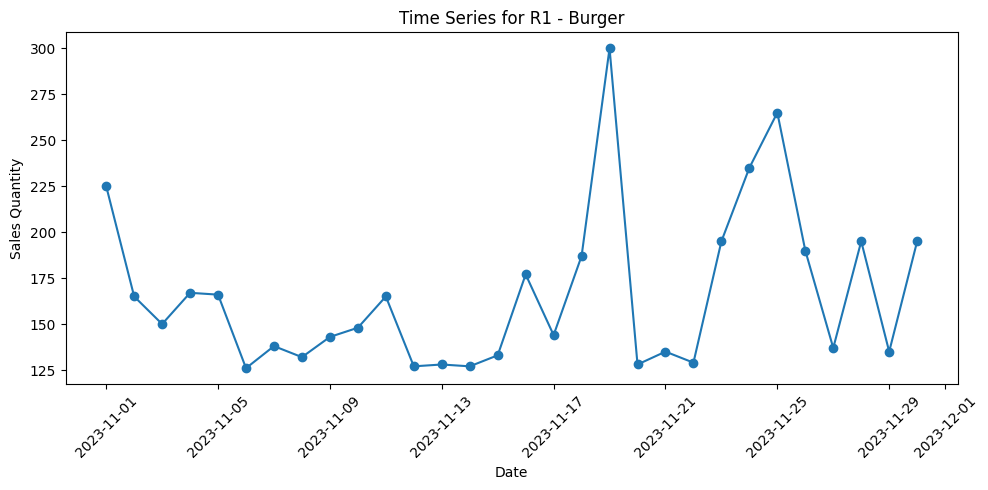

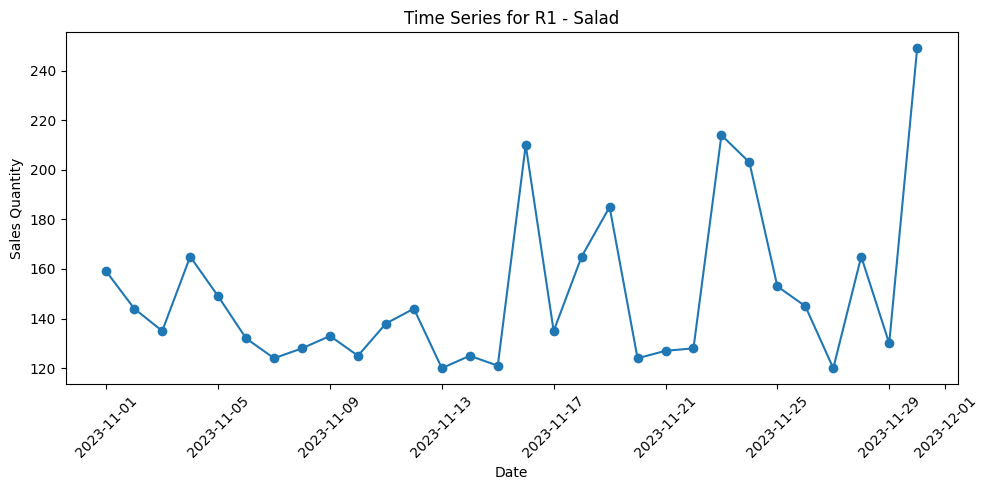

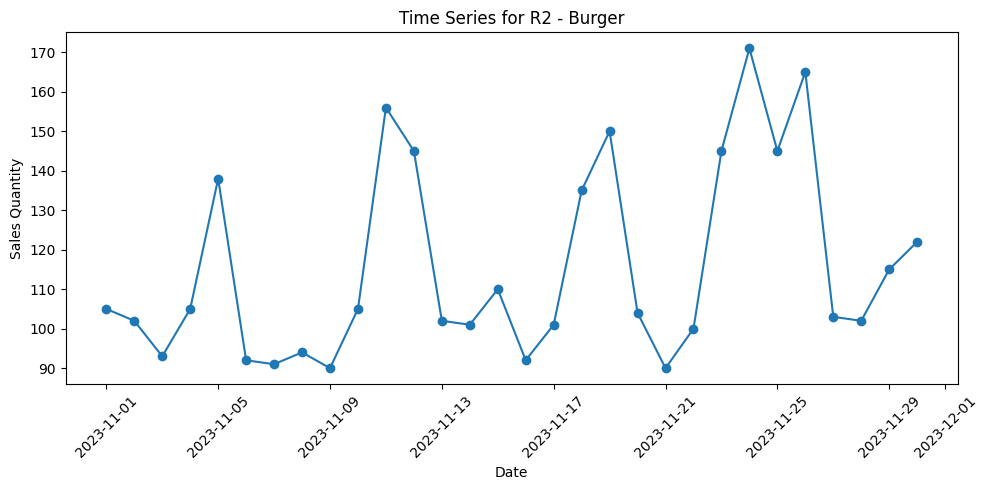

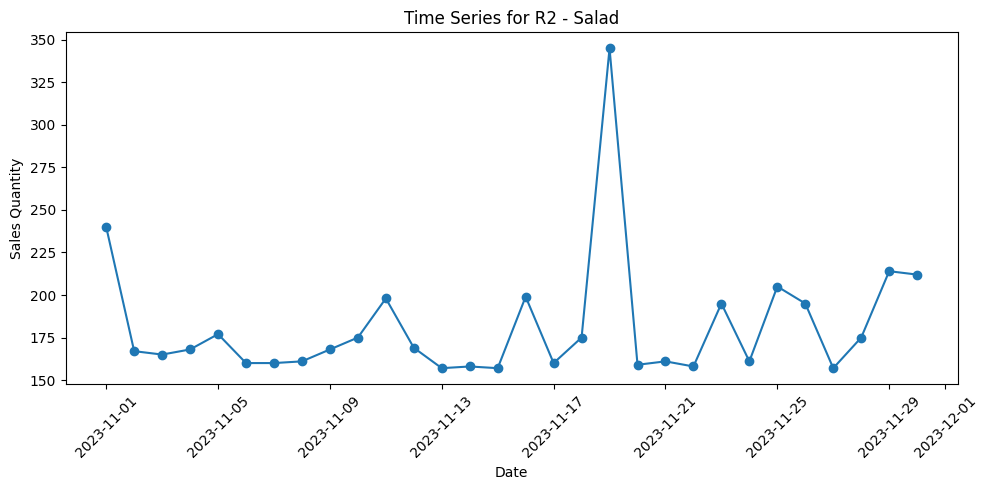

                            OLS Regression Results                            
Dep. Variable:         sales_quantity   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     35.45
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           9.72e-22
Time:                        16:43:37   Log-Likelihood:                -564.11
No. Observations:                 120   AIC:                             1140.
Df Residuals:                     114   BIC:                             1157.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               83.5322      8.916  

/var/folders/tl/fqm4n5tn49vg7yj320kzfb980000gn/T/ipykernel_2046/1219694258.py:68: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data_subset['discount_percent'].fillna(0, inplace=True)
/var/folders/tl/fqm4n5tn49vg7yj320kzfb980000gn/T/ipykernel_2046/1219694258.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_subset['discount_p

KeyError: 'date'

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the datasets
train_data = pd.read_csv('data/train/historicsales_fastfooditems_train.csv')
test_data = pd.read_csv('data/train/historicsales_fastfooditems_test.csv')

# Review the first row of the training data
print(train_data.head(1))

# Check the data types
print(train_data.dtypes)

# Fill in missing values in the discount_percent column
train_data['discount_percent'].fillna(0, inplace=True)

# Convert the date column into date format
train_data['date'] = pd.to_datetime(train_data['date'], format='%d-%b-%y')
test_data['date'] = pd.to_datetime(test_data['date'], format='%d-%b-%y')

# Train the machine learning model
X = train_data[['baseprice_USD', 'discount_percent', 'is_weekend', 'is_friday', 'is_holiday']]
y = train_data['sales_quantity']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()

# Find correlation between the discount and sales quantity on the full training data
correlation_full = train_data['discount_percent'].corr(train_data['sales_quantity'])
print(f'Correlation (full data): {correlation_full}')

# Find the same correlation for different subsets of restaurants and food items
correlation_by_restaurant_item = train_data.groupby(['restaurant', 'item_name']).apply(
    lambda x: x['discount_percent'].corr(x['sales_quantity'])
)
print(correlation_by_restaurant_item)

# Save the highest correlation pair
highest_correlation_pair = correlation_by_restaurant_item.idxmax()
highest_correlation_value = correlation_by_restaurant_item.max()
print(f'Highest correlation pair: {highest_correlation_pair} with value: {highest_correlation_value}')

# Plot time series data for each restaurant-item pair
for (restaurant, item), group in train_data.groupby(['restaurant', 'item_name']):
    plt.figure(figsize=(10, 5))
    plt.plot(group['date'], group['sales_quantity'], marker='o')
    plt.title(f'Time Series for {restaurant} - {item}')
    plt.xlabel('Date')
    plt.ylabel('Sales Quantity')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Build a regression model using the full training data
model_summary = model.summary()
print(model_summary)

# Try out different subsets of the data or predictors to get a better adjusted r-squared score
best_adjusted_r_squared = model.rsquared_adj
print(f'Best Adjusted R-squared: {best_adjusted_r_squared}')

# Store your best adjusted score
best_adjusted_score = best_adjusted_r_squared

# Subset the test data to match the training set
test_data_subset = test_data[['baseprice_USD', 'discount_percent', 'is_weekend', 'is_friday', 'is_holiday']]
test_data_subset['discount_percent'].fillna(0, inplace=True)
test_data_subset['date'] = pd.to_datetime(test_data_subset['date'], format='%d-%b-%y')

# Build a regression model using the full training data
model_summary = model.summary()
print(model_summary)

# Try out different subsets of the data or predictors to get a better adjusted r-squared score
best_adjusted_r_squared = model.rsquared_adj
print(f'Best Adjusted R-squared: {best_adjusted_r_squared}')

# Store your best adjusted score
best_adjusted_score = best_adjusted_r_squared

# Subset the test data to match the training set
test_data_subset = test_data[['baseprice_USD', 'discount_percent', 'is_weekend', 'is_friday', 'is_holiday']]
test_data_subset['discount_percent'].fillna(0, inplace=True)
test_data_subset['date'] = pd.to_datetime(test_data_subset['date'], format='%d-%b-%y')